In [1]:
from utils.dataset_utils import load_dataset
from models.model_builder import generate_model_summary
from sklearn.linear_model import LinearRegression
import numpy as np


In [2]:
import warnings
warnings.simplefilter("ignore")

# Loading Dataset
the current dataset is being loaded with a StandardScaler on age, bmi and children columns and a OneHotEncoder on the region column.

In [3]:
X_train, X_test, y_train, y_test = load_dataset(
    "dataset/data.csv",
    **{
        # "std_scaler": ["age", "bmi", "children"],
        # "min_max_scaler": ["age", "bmi", "children"],
        "one_hot_encoder": ["region"]
    }
)

# Building Models

# 1- LinearRegression

In [4]:
summary = generate_model_summary(
    "LinearRegression01",
    LinearRegression(),
    X_train,
    X_test,
    y_train,
    y_test,
    polynomial_features={"degree": 2},
    rfe={
        "estimator": LinearRegression()
    },
    validation_curve={
        "param_name": 'polynomialfeatures__degree',
        "param_range": np.arange(1, 4, 1),
        "cv": 2
    },
    learning_curve={
        "cv": 2,
        "train_sizes":np.linspace(0.3, 1, 25)
    },
    # grid_search={
    #     "param_grid": {
    #         'polynomialfeatures__degree': range(4),
    #         'linearregression__normalize': [True, False]
    #     },
    #     "n_jobs": 3
    # }
)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


MSE:
21444836.20980706
R2:
0.8379014554769094
Validation Curve Data [[0.62492301 0.62220013]
 [0.82882285 0.80325519]
 [0.8492476  0.82094663]] [[0.58917454 0.65674664]
 [0.79412866 0.81990179]
 [0.79487203 0.8225885 ]] [1 2 3]


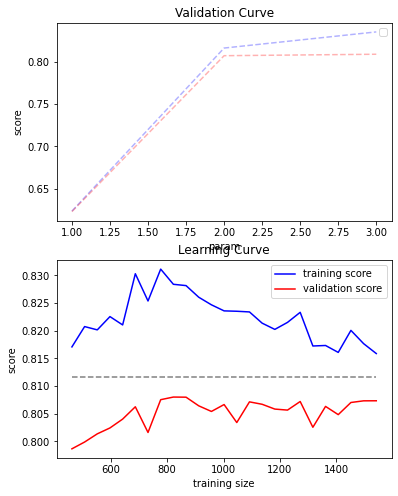

In [5]:
summary.display()

In [6]:
summary.to_json("./dist/result.json")

In [7]:
list(np.array([1,2,3,4]))


[1, 2, 3, 4]

In [8]:
list([1,2,3,4])

[1, 2, 3, 4]